Github: https://github.com/heberjuunior/Heber_ML_CA1_Y4

In [4]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [5]:
df = pd.read_csv('log2.csv')

In [ ]:
df.head(20)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# Group the data by "Action" and count the occurrences of each action
action_counts = df['Action'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
action_counts.plot(kind='bar', color='skyblue')
plt.title('Overview of Action Statuses')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called df
# For example:
# df = pd.read_csv("your_dataset.csv")

# Create a violin plot to visualize the relationship between "Source Port" and "Action"
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Action', y='Source Port', palette='Set2')
plt.title('Relationship between Source Port and Action')
plt.xlabel('Action')
plt.ylabel('Source Port')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Create a box plot to visualize the relationship between "Elapsed Time" and "Action"
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Action', y='Elapsed Time (sec)', palette='Set2')
plt.title('Elapsed Time vs. Action (Box Plot)')
plt.xlabel('Action')
plt.ylabel('Elapsed Time (sec)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Define a function to remove outliers from a given column
def remove_outliers(column):
    # Calculate the 25th and 75th percentiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the column to keep values within the bounds
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Remove outliers from all integer columns except 'Action'
numerical_columns = df.select_dtypes(include='int64').columns
for col in numerical_columns:
    if col != 'Action':
        df[col] = remove_outliers(df[col])

# Display the modified DataFrame
df.head()

In [ ]:
# Define numerical columns excluding 'Action'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Drop 'Action' column from numerical columns list
numerical_columns = numerical_columns.drop('Action', errors='ignore')

# Fill missing values with the mean of each numerical column
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Display the modified DataFrame
df.head()


In [ ]:
# Extract unique packets
unique_packets = df['NAT Destination Port'].unique()
print(unique_packets)

In [ ]:
# Extract unique packets
unique_packets = df['Elapsed Time (sec)'].unique()
print(unique_packets)

In [6]:
df_encoded = pd.get_dummies(df, columns = ['Action']) 
df_encoded.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action_allow,Action_deny,Action_drop,Action_reset-both
0,57222,53,54587,53,177,94,83,2,30,1,1,True,False,False,False
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,True,False,False,False
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,True,False,False,False
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,True,False,False,False
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,True,False,False,False


In [8]:
# Count total number of each action
action_counts = df['Action'].value_counts()

# Print the total count of each action
print("Total count of each action:")
print(action_counts)

Total count of each action:
Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64


In [9]:
# Group the data by the "Action" column and sum the values of "NAT Source Port" and "NAT Destination Port"
action_totals = df_encoded.groupby('Action_deny')[['NAT Source Port', 'NAT Destination Port']].sum()

# Print the total sum of NAT Source Port and NAT Destination Port related to each action
print("Total sum of NAT Source Port and NAT Destination Port related to each action:")
print(action_totals)


Total sum of NAT Source Port and NAT Destination Port related to each action:
             NAT Source Port  NAT Destination Port
Action_deny                                       
False             1263174762             175006810
True                  477009                 32434


In [43]:
# Define categorical features
categorical = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

# Create a list to store data for table visualization
table_data = []

# Define top 10 levels per feature
for f in categorical:
    feature_data = df_encoded[f].value_counts().head(10)
    table_data.append([f, '\n'.join(map(str, feature_data.index)), '\n'.join(map(str, feature_data.values))])

# Print table visualization
print(tabulate(table_data, headers=['Feature', 'Top 10 Entries', 'Count'], tablefmt='grid'))


+----------------------+------------------+---------+
| Feature              | Top 10 Entries   | Count   |
+======================+==================+=========+
| Source Port          | 58638            | 840     |
|                      | 27005            | 513     |
|                      | 443              | 273     |
|                      | 57470            | 222     |
|                      | 49418            | 210     |
|                      | 6881             | 177     |
|                      | 0                | 173     |
|                      | 50584            | 116     |
|                      | 3478             | 105     |
|                      | 26900            | 102     |
+----------------------+------------------+---------+
| Destination Port     | 53               | 15414   |
|                      | 445              | 12891   |
|                      | 443              | 11684   |
|                      | 80               | 4035    |
|                      | 251

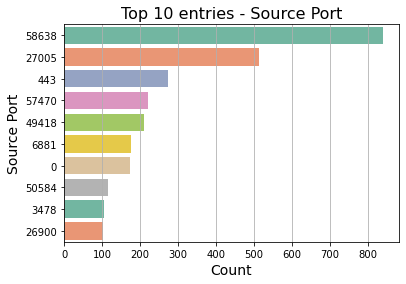

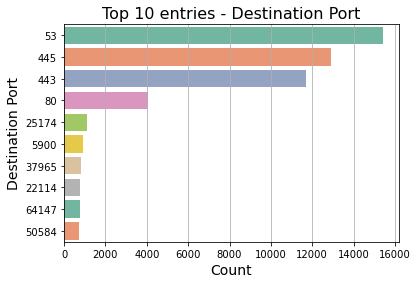

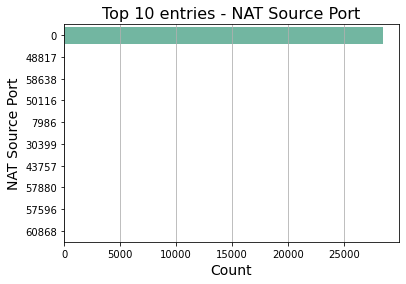

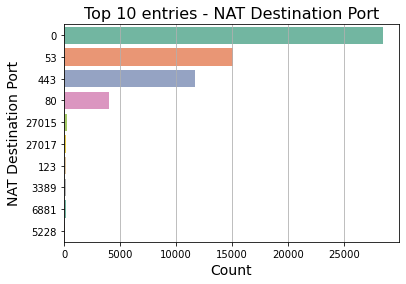

In [44]:
# Define categorical features
categorical = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

# Define top 10 entries per feature and plot
for f in categorical:
    top_10 = df_encoded[f].value_counts().head(10)
    sns.countplot(y=f, data=df_encoded, order=top_10.index, palette='Set2')
    plt.title(f'Top 10 entries - {f}', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(f, fontsize=14)
    plt.grid(axis='x') 
    plt.show()

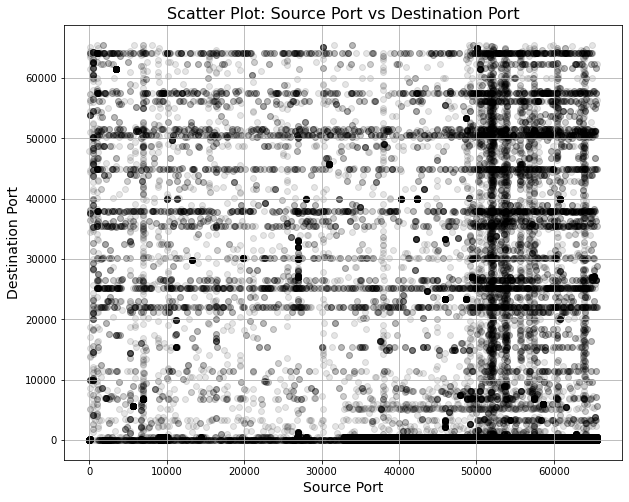

In [66]:
# Scatter plot for Source Port vs Destination Port
plt.figure(figsize=(10, 8))
plt.scatter(df['Source Port'], df['Destination Port'], alpha=0.1, color='black')
plt.xlabel('Source Port', fontsize=14)
plt.ylabel('Destination Port', fontsize=14)
plt.title('Scatter Plot: Source Port vs Destination Port', fontsize=16)
plt.grid(True)
plt.show()